In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA

In [2]:
data = pd.read_csv('C:/Users/0&1/Downloads/Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
data.describe() 

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


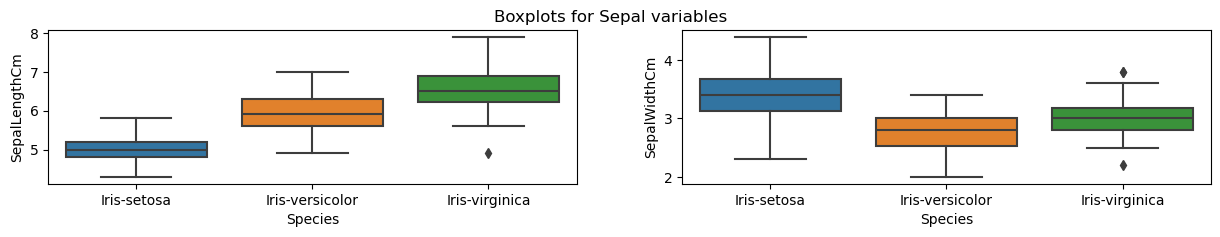

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(15, 2))
fig.suptitle('Boxplots for Sepal variables')
sns.boxplot(ax=axes[0], x=data['Species'], y=data['SepalLengthCm'])
sns.boxplot(ax=axes[1], x=data['Species'], y=data['SepalWidthCm'])
plt.show();

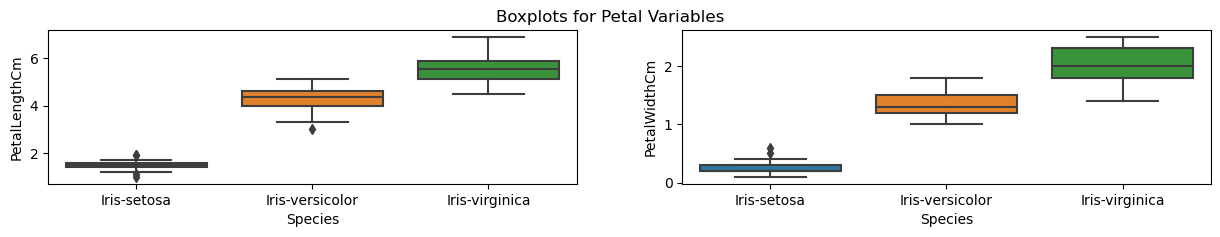

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 2))
fig.suptitle('Boxplots for Petal Variables')
sns.boxplot(ax=axes[0], x=data['Species'], y=data['PetalLengthCm'])
sns.boxplot(ax=axes[1], x=data['Species'], y=data['PetalWidthCm'])
plt.show();

In [8]:
manova = MANOVA.from_formula('SepalLengthCm + SepalWidthCm + \
                            PetalLengthCm + PetalWidthCm  ~ Species', data=data)
print(manova.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept         Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0170 4.0000 144.0000 2080.5278 0.0000
         Pillai's trace  0.9830 4.0000 144.0000 2080.5278 0.0000
 Hotelling-Lawley trace 57.7924 4.0000 144.0000 2080.5278 0.0000
    Roy's greatest root 57.7924 4.0000 144.0000 2080.5278 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
        Species          Value  Num DF  Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda  0.0235 8.0000 288.0000  198.7110 0.0000
         Pillai's trace  1.1872 8.0000 290.00

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
X = data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y = data['Species']
post_hoc = lda().fit(X=X, y=y)

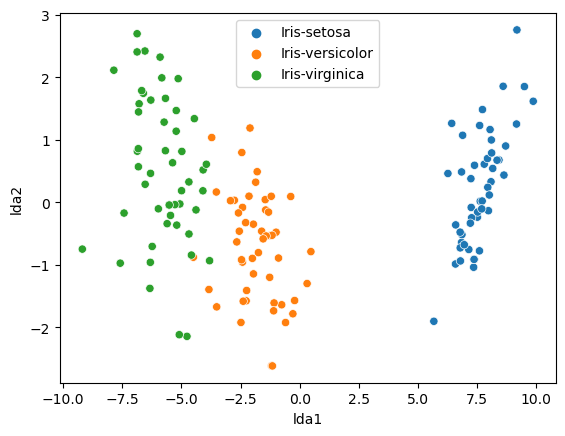

In [10]:
X_new = pd.DataFrame(lda().fit(X=X, y=y).transform(X), columns=["lda1", "lda2"])
X_new["Species"] = data["Species"]
sns.scatterplot(data=X_new, x="lda1", y="lda2", hue=data.Species.tolist())
plt.show()